# TP4 - Les fichiers et matplotlib - INF2

## Exercice 1-1

**A) Avec la bibliothèque matplotlib on veut reproduire la même chose que le graphique ci-dessous :**

Il faudra mettre en place une fonction cercle(x0,y0,r) permettant de tracer le cercle de centre (x0,
y0) et de rayon r.

![cercle_colore_1](Image-Rapport/cercle_colore_1.png)

**Notre raisonnement :**

A l'aide de la bibliothèque matplotlib nous cherchons à mettre en place une fonction capable de tracer un cercle de centre (x0, y0) et de rayon r.

Pour cela nous avons deux possibilités :

- La première : la bibliothèque matplotlib possède une fonction Circle qui permet de tracer un cercle de centre (x0, y0), de rayon r. Cette fonction prend en paramètre le centre du cercle (un tuple : x0, y0), le rayon du cercle (valeur réelle), la couleur du cercle (noir par défaut sinon à préciser`color="green"` par exemple) et le remplissage (ou non) du cercle (`fill=bool` : bool = True / False).


- La seconde : générer une série de points abscisses et ordonnées afin de tracer une courbe (le cercle). Pour cela, nous importons la librairie numpy  : `import numpy `. Nous utilisons la méthode `numpy.linspace` permettant de créer un ensemble de n points (uniformément espacés) compris entre deux valeurs (min et max) matrice:`data_set = numpy.linspace[min, max, nb_points] `. Nous allons à l'aide de linspace, créer l'ensemble des valeurs de x et des y. Depuis l'équation d'un cercle : `(x-x0)² + (y-y0)² = r²`, que nous transformons en coordonnées polaires. `x = rayon * cos(theta_angle) + x0` et `y = rayon * sin(theta_angle) + y0` (theta angle prends une valeur entre 0 et 2pi). Enfin, nous utilisons la fonction ```.plot()``` permettant d’afficher la courbe composée des points ayant x comme abscisse et y comme ordonnée.

Nous avons choisi d'utiliser la seconde possibilités afin que les couleurs soient gérées automatiquement par matplotlib (évitant d'importer le module random, de créer une liste des couleurs). Pour un soucis de mise en forme, nous égalisons l'échelle de l'axe des abscisses et des ordonnées par la méthode `.axis("equal")` (nous n'avons pas de déformations du cercle).

**Importations :**

In [1]:
import matplotlib.pyplot as plt
import numpy as np 

**Fonction cercle :**

In [2]:
def cercle(x0, y0, rayon):
    theta = np.linspace(0, 2 * np.pi, 100) # Génère une liste de 100 valeurs entre à 0 et 2 pi

    abscisse = rayon * np.cos(theta) + x0 # Génère la liste des valeurs de x, d'après les coordonnées polaires
    ordonnee = rayon * np.sin(theta) + y0 # Génère la liste des valeurs de y, d'après les coordonnées polaires

    plt.plot(abscisse, ordonnee)
    plt.axis("equal")

**Test :**

Nous allons créer un cercle de centre (0.,0.) et de rayon 1 afin de tester notre fonction cercle : 

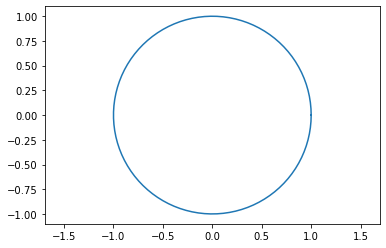

In [3]:
cercle(0.,0.,1)

**Affichage du cercle coloré de l'énoncé :**

Nous remarquons que les coordonnées du centre des différents cercles sont les mêmes : (10.,10.). Le rayon croît de 1 à 9. Nous allons donc utiliser une boucle `for` (pris entre 1 et 10 (non compris)). Une fois les différents cercles créés, nous donnons un titre au graphique avec `plt.title("Titre")` et nous les affichons avec la méthode : `plt.show()`.

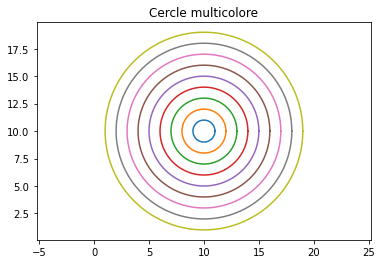

In [4]:
for rayon in range(1, 10):
    cercle(10.,10.,rayon) # Génère un cercle de centre (10.,10.) et de rayon r

plt.title("Cercle multicolore")
plt.show()

## Exercice 1-2

**B ) Même exercice que le A, avec le graphique suivant :**
![cercle_colore_2](Image-Rapport/cercle_colore_2.png)

Nous devons tracer une pyramide de cercle. A la base de cette pyramide il y a une série de 10 cercles et au sommet de la pyramide un unique cercle. Nous utilisons la fonction cercle définie précédemment permettant de tracer un cercle de rayon r et de centre (x0,y0). Ici l'abscisse et l'ordonnée du centre du cercle varie d'un cercle à l'autre, mais le rayon est fixe : 1.
Nous avons de nouveau deux raisonnements possibles :

- Le premier : En partant du cercle présent au sommet nous allons augmenter le nombre de cercle par ligne jusqu'à 10 cercles (dernière ligne en partant du haut). Pour cela nous utilisons une boucle `for` (de 1 à 11 (non compris)). Nous remarquons qu'à chaque ligne l'ordonnée du centre diminue de 2 (2 * rayon) et que l'abscisse du centre du premier cercle (le plus à gauche) de chaque rangée diminue de 1. Donc dans la boucle `for`, après avoir affiché les cercles d'une rangée nous avons ```abscisse -= 1``` et ```ordonnee -= 2```. Nous allons maintenant afficher les cercles d'une rangée. Nous observons que les valeurs des abscisses des centres du cercle, augmente de 2 (2 * rayon). Ainsi, nous allons utiliser une valeur temporaire de l'abscisse du centre du cercle que l'on augmentera de 2 dans une seconde boucle `for` permettant d'afficher les n cercles de la rangée. Cette seconde boucle `for` va de 1 (au moins 1 cercle) à la rangée + 1 (donc de 1 à n +1 (non compris, ainsi nous allons jusqu'à n)). Ainsi notre abscisse du centre initiale est de 7 (9 : abscisse du cercle visible, et nous enlevons 2 car nous passons obligatoirement dans la boucle `for` qui va ajouter 2; 9 - 2 = 7) et l'ordonnée est 18.



- Le second : En partant du bas de la pyramide et du cercle le plus à gauche de coordonnées (0.,0.). Nous remarquons que nous allons cette fois devoir faire varier les ordonnées de 0 à 18 avec un pas de 2 (boucle `for ordonne in range(0,19,2):`, range(min, max, pas) avec un pas entier). Dans l'objectif de faire varier les abscisses nous utilisons une boucle `for`. En remarquant que l'abscisse du centre du premier cercle de chaque rangée va augmenter de 1 et que celle du centre du dernier cercle de chaque rangée va diminuer de 1, et ce jusqu'à se confondre en 9. Nous en déduisant que la boucle `for` va varier entre [[0 (abscisse du centre du premier cercle de la première rangée) + 1 à chaque rangée] jusqu'à [19 (abscisse du centre du dernier cercle de la première rangée) - 1 à chaque rangée]]. Or, nous avons un pas de 2 pour chaque ordonée, nous allons donc diviser l'ordonnée par 2, `ord//2`, afin d'avoir le quotient (valeur entière, une valeur réelle ne fonctionnerait pas dans le range sauf si : int(ord/2)).

## Pyramide de cercle : 

**Dans ce cas nous raisonnons en partant du cercle le plus haut de la pyramide :**

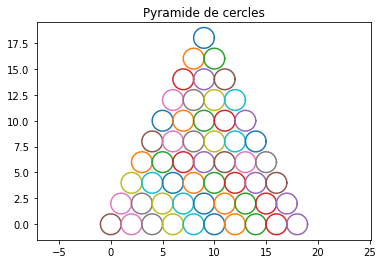

In [5]:
abscisse_cercle, ordonnee_cercle = 7., 18.

for nb_cercle in range(1, 11):
        abscisse_cercle_temp = abscisse_cercle 
        for j in range(1, nb_cercle + 1): 
            abscisse_cercle_temp += 2 
            cercle(abscisse_cercle_temp, ordonnee_cercle, 1) # créé le cercle avec x0, y0, rayon = 1
        abscisse_cercle -= 1
        ordonnee_cercle -= 2
        
plt.xlim(-6, 24)
plt.ylim(-1.5, 19.5)
plt.title("Pyramide de cercles")
plt.show()

**En raisonnant par le bas, nous obtenons ce programme :**

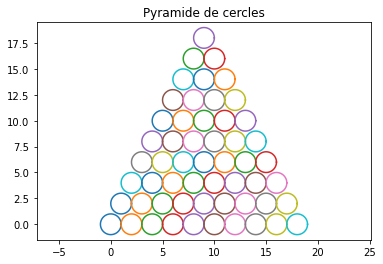

In [6]:
abscisse_cercle, ordonnee_cercle = 0., 0.

for ordonnee in range(0, 19, 2): 
    for abscisse in range(ordonnee//2, 19 - ordonnee//2, 2):
        cercle(abscisse, ordonnee, 1) 
        
plt.xlim(-6, 24)
plt.ylim(-1.5, 19.5)
plt.title("Pyramide de cercles")
plt.show()

Nous remarquons qu'avec le second raisonnement nous obtenons exactement la même figure que l'énoncé. Quant à la première figure l'ordre des couleurs n'est pas le même mais la forme est la même.

## Exercice 2 :

Ecrire un programme qui stocke et affiche les valeurs de cos(x) et x allant de -5 à 5 avec une
incrémentation de 1.

- A) Ecrire une fonction ecrire() qui permet de stocker les résultats dans un fichier math.csv.
- B) Ecrire une fonction lire() qui permet de lire le fichier math.csv et d’afficher le résultat grâce à matplotlib.

Résultat désiré :

![courbe_cosinus.png](Image-Rapport/courbe_cosinus.png)

**Notre raisonnement :**

Le but de l’exercice est de pouvoir écrire et lire un fichier .csv. Nous devons y mettre les valeurs de x compris entre -5 et 5 avec une incrémentation de 1 et la valeur de son cosinus.
Nous avons les fonctions ecrire() et lire().

- ecrire(), fonction permettant d'écrire les valeurs d'un dictionnaire passé en paramètre dans un fichier `.csv`. Nous avons également un paramètre permettant de choisir le nom du fichier final, par défaut : `math.csv`. Nous utilisons la librairie `pandas`, afin de créer un dataframe (`pandas.`**DataFrame**`(dict)`) contenant les valeurs du dictionnaire passé en paramètre et nous donnons des noms aux colonnes à l'aide de `column=["nom1","nom2"]` (par défaut les noms des colonnes sont les clés du dictionnaire). Ensuite nous utilisons la fonction `data_set.`**to_csv**`(nom_dict, index=False, sep=";")`, `index=False` nous permet de ne pas avoir une colonne ne contenant que les index et `sep=";"` nous permet de choisir le séparateur de valeurs.



- lire(), fonction permettant de lire un fichier `.csv` et d'afficher la courbe des valeurs contenus dans ce fichier. Afin de lire le fichier et stocker les valeurs dans un dataframe nous utilisons `pd.`**read_csv**`(nom_dict, delimiter=";")`. Nous séparons ensuite, les valeurs de x et celles de cosx. Enfin, comme dans l'exercice 1, nous utilisons la méthode `plot` de matplotlib, `title` nous permet de mettre un titre, et `legend` d'afficher le nom de la courbe que l'on renseigne dans `plot(label="nom de la courbe")`. Quant aux paramètres de la fonction lire(), nous avons d'abord l'incrementation (par défaut de 1, mais peut être précisée) et comme la fonction ecrire(), le nom du dictionnaire (par défaut `math.csv`)

**Importation :**

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

**Fonction ecrire :**

In [8]:
def ecrire(dictionnaire_valeur, nom_dict="math.csv"):
    data = pd.DataFrame(dictionnaire_valeur, columns=["x", "cos_x"])
    data.to_csv(nom_dict, index=False, sep=";")

**Fonction lire :**

In [9]:
def lire(incrementation=1, nom_dict="math.csv"):
    data = pd.read_csv(nom_dict, delimiter=";")
    
    value_x = data.x
    value_cos_x = data.cos_x
    
    plt.title(f"Fonction cosinus entre -5 et 5, incrementation : {incrementation}")
    plt.plot(value_x, value_cos_x, label="f(x)=cos(x)")
    plt.legend()
    plt.show()

**Test :**

Pour afficher la courbe demandée, à savoir : x entre -5 et 5 et une incrémentation de 1.
Nous utilisons des variables xmin, xmax et nb_points. Nous utilisons ensuite la méthode `np.`**linspace**`(min, max, nb_points)` de la librairie numpy (comme dans l'exercice 1). Afin de générer la liste des valeurs de x puis de cos(x). Nous utilisons un dictionnaire de la forme : `{"x" : liste_valeur_x, "cos_x" : liste_valeur_cos_x}`. Nous appelons les fonctions ecrire et lire (en utilisant les valeurs par défaut, nom de fichier et incrementation). 

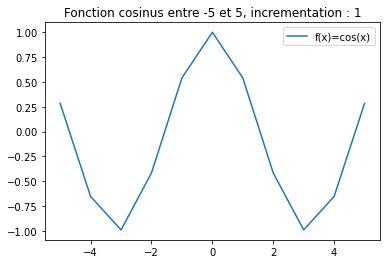

In [10]:
valeurx_min = -5
valeurx_max = 5
nb_point = 11

valeur_x = np.linspace(valeurx_min, valeurx_max, nb_point)
valeur_cosX = np.cos(valeur_x)
data_x_cosx = {"x": valeur_x, "cos_x" : valeur_cosX}

ecrire(data_x_cosx)
lire()

**Remarque :** 

Nous remarquons que la courbe n'est pas très précise. Nous augmentons le nombre de points, avec 100 points nous allons être beaucoup plus précis. Pour afficher la nouvelle courbe, à savoir : x entre -5 et 5 et une incrémentation de 0.01 (100 points).

Nous utilisons des variables xmin, xmax et nb_points. Nous utilisons ensuite la méthode `np.`**linspace**`(min, max, nb_points)` de la librairie numpy (comme dans l'exercice 1). Afin de générer la liste des valeurs de x puis de cos(x). Nous utilisons un dictionnaire de la forme : `{"x" : liste_valeur_x, "cos_x" : liste_valeur_cos_x}`. Nous appelons les fonctions ecrire et lire (sans utiliser les valeurs par défaut: `ecrire(dictionnaire_valeur, nom__nouveau_fichier)` et `lire(incrementation, nom_nouveau_fichier)`). 

L'incrémentation est calculée de la manière suivante : [(valeur_max - valeur_min)/nb_point]

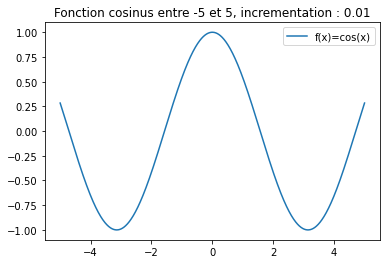

In [11]:
valeurx_min = -5
valeurx_max = 5
nb_point = 1000
incrementation = (valeurx_max-valeurx_min)/nb_point

valeur_x = np.linspace(valeurx_min, valeurx_max, nb_point)
valeur_cosX = np.cos(valeur_x)
data_x_cosx = {"x": valeur_x, "cos_x" : valeur_cosX}

ecrire(data_x_cosx,"math2.csv") # Nous renommons le fichier afin de ne pas écraser le précédent
lire(incrementation, "math2.csv")

# Exercice 3 :
Soit un fichier typé intitulé concours.txt qui comporte les enregistrements
relatifs aux candidats d’un concours. Chaque enregistrement est composé
de : NCIN, NOM, PRENOM, AGE, DECISION : (type contenant les identificateurs
suivants : admis, refusé, ajourné), et séparé par point virgule (;).
Travail demandé :

1. Définir la fonction saisir() qui permet de remplir les données relatives aux candidats dans le fichier concours.txt


2. Définir la fonction admis() qui permet créer le fichier admis.txt comportant les données relatives aux candidat admis


3. Afin de sélectionner en priorité les candidats admis et âgés moins de 30 ans, créer la fonction attente() qui produira à partir du fichier admis.txt, un nouveau fichier intitulé attente.txt comportant les données relatives aux candidats admis et âgés plus que 30 ans. Une ligne du fichier attente.txt comprend le NCIN, le NOM et PRENOM d’un candidat séparés par point virgule (;).


4. Définir la fonction statistiques(dec) qui permet de retourner le pourcentage des candidats pour la décision dec (admis, refusé et ajourné).

Exemple : Le pourcentage des candidats admis = (Nombre des candidats admis / Nombre des candidats) *100. Il faudra avec matplotlib afficher un camenbert ( Candidats admis, refusé et ajourné ). Pour vous aider, voici ce site : http://www.python-simple.com/pythonmatplotlib/pie.php .


5. Définir la fonction supprimer() qui supprimera du fichier admis.txt les candidat âgés plus de 30 ans.

**Raisonnement :**

Nous allons devoir remplir le fichier `concours.txt`, créer un fichier contenant les admis, calculer les pourcentages des différentes décisions et enfin supprimer de la liste admis les étudiants ayant plus de 30ans. Nous importons seulement `matplotlib`, utilisée pour créer le camembert. Pour écrire dans un fichier nous utilisons la méthode : `nom_variable_fichier.`**write**`(elt_de_type_str)`

**Importation :**

In [12]:
import matplotlib.pyplot as plt

1. Une fonction `saisir()` n'ayant pas de paramètres. Dans cette fonction nous allons remplir les données relatives aux candidats dans des variables puis les inscrires dans le fichiers `concours.txt`. Pour cela nous allons dans un premier temps ouvrir le fichier avec la méthode `with open("nom_du_fichier", "mode_de_lecture") as nom_variable:` (permettant de ne pas avoir à fermer le fichier, évitant d'avoir un fichier ne se fermant jamais si une erreur survient entre l'ouverture et la fermeture). Le mode d'écriture peut prendre une des valeurs suivantes : "w": écriture uniquement, "a" : ajouter du contenu, "r" : lire le fichier. Nous choisissons le mode "a" permettant de créer le fichier (s'il n'existe pas) et d'y ajouter les valeurs, sans ecraser les valeurs déjà existantes. Nous faisons une boucle `while` afin que l'utilisateur puisse saisir autant de candidat qu'il le souhaite. Dans cette boucle nous allons demander le NCIN, le NOM, le PRENOM, l'AGE (dont nous vérifions la validité, compris entre 0 et 150, en capturant l'erreur de type) et la DECISION (dont nous vérifions la validité, admis ou refuse ou ajourne, rien d'autre). Nous assemblons ensuite, ces valeurs dans une chaîne de caractère, séparés par des points virgules et se terminant par un retour à la ligne `\n`.

In [13]:
def saisir():
    with open('concours.txt', "a") as file:
        fini = False
        while not fini:
            NCIN = input("Entrez NCIN : ")
            NOM = input("Entrez NOM : ")
            PRENOM = input("Entrez PRENOM : ")
            AGE = -1
            while not 0 < AGE < 150:
                try:
                    AGE = int(input("Entrez AGE : "))
                except TypeError:
                    print("Erreur de type")
            DECISION = ""
            while DECISION not in {"admis", "refuse", "ajourne"}:
                DECISION = input("Entrez DECISION (admis, refuse, ajourne) : ")
            file.write(f'{NCIN};{NOM};{PRENOM};{AGE};{DECISION}\n')
            fini = input("Avez-vous fini ? (N : Non, O : Oui) : ").upper() == "O"
            print()

2. La fonction admis(), ouvre le fichier `concours.txt` (capturant les erreurs liées à ce fichier, exemple s'il n'existe pas), et récupère ensuite l’ensemble des candidats ayant la decision `admis`. Nous allons ensuite ouvrir un fichier `admis.txt` en mode "w" (nous faisons tourner cette fonction une fois le fichier créé, donc le mode "a" ne fera que dupliquer les valeurs, le mode "w" est le plus approprié). Afin de vérifier qu'elles sont les valeurs à ajouter au fichier admis.txt nous allons transformer chaque ligne en une liste des éléments séparer par ";", à l'aide de la fonction `.split()`. Ainsi `mot="a;b;c;d"` donne `list = mot.split(";")` : `list = ["a", "b", "c", "d"]`. Nous verifions la décision du jury (en position 4 dans la liste du candidat, en enlevant le \n à l'aide de la fonction `.strip()`. Si la décision est admis on rajoutera le candidat au fichier admis.txt.

In [14]:
def admis():
    try:
        with open('concours.txt') as file:
            with open("admis.txt", "a") as admis_file:
                for ligne in file:
                    line = ligne.split(";")
                    if line[4].strip() == 'admis':
                        admis_file.write(ligne)
    except OSError as e:
        print("Erreur : ", e)

3. La fonction attente(), ouvre le fichier `admis.txt` (capturant les erreurs liées à ce fichier, exemple s'il n'existe pas), et récupère ensuite l’ensemble des candidats ayant un âge supérieur à 30 ans pour les ajouter au fichier `attente.txt`. De la même manière que la fonction admis(), nous utilisons les méthodes `.split(";")` et `.strip()`. Nous devons ici convertir le 3ème élèment de la liste (l'âge) en nombre entier (à l'aide de `int(line[3].strip())`. Puis nous écrivons le NCIN, le NOM et le PRENOM, à l'aide de la liste, dans le fichier `attente.txt`: `file_attente.write(f'{line[0]};{line[1]};{line[2]}\n')` (line[0] : NCIN, line[1] : NOM, line[2] : PRENOM)

In [15]:
def attente():
    try:
        with open("admis.txt") as file_admis:
            with open("attente.txt", "w") as file_attente:
                for ligne in file_admis:
                    line = ligne.split(";")
                    if int(line[3].strip()) > 30:
                        file_attente.write(f'{line[0]};{line[1]};{line[2]}\n')
    except OSError as e:
        print("Erreur : ", e)

4. Les fonctions statistiques() et camembert(), sont liées. La fonction camembert appelle la fonction statistiques afin d'obtenir les pourcentages des différentes décisions. 

    - La fonction statistiques initialise le nombre de candidat pour chacune des décisions et va lors de la lecture du fichier `concours.txt` (dont nous capturons également les erreurs) ajoute 1 au nombre de candidat par décision en fonction de la décision lue. Après avoir lu le fichier complet nous additionnons les valeurs du nombre de candidat par décisions afin d'obtenir le nombre total de candidat. Nous allons ensuite calculer le pourcentage de chaque décision à l'aide de la formule : `pourcentage_decision = (nb_candidat_decision / nb_candidat_total) * 100` et le dernier pourcentage est calculé à l'aide de la formule : `100 - pourcentage_decision1 - pourcentage_decision_2` (permettant d'obtenir un total de 100 dans tous les cas, évite l'erreur d'un pourcentage de 33.33 * 3 = 99.99 != 100). La fonction statistiques va enfin, renvoyer le pourcentage de la decision précisée en paramètre
    
    - La fonction camembert appelle la fonction statistiques afin d'obtenir les pourcentages des différentes décisions.  Nous utilisons les méthodes `pie()` et `show()` de matplotlib. La méthode `pie` a en paramètre : la liste des valeurs, labels = la liste des noms associés aux valeurs,normalize=True : permettant d'obtenir dans tous les cas un camembert en disque plein,  autopct=lambda x: str(round(x, 2)) + '%' : permettant d'afficher la valeur des pourcentages de chaque décision dans le camembert, pctdistance=0.6 : permettant d'afficher les pourcentages avec une distance de 0.6 du centre du camembert, et labeldistance=1.1 : permettant d'afficher les noms des décisions associées aux valeurs avec une distance de 1.1 du bord du camembert. Comme dans l'exercice 2 nous utilisons `.title("...")` et `.show()`.

In [16]:
def statistiques(dec):
    nb_admis = 0
    nb_refuse = 0
    nb_ajourne = 0
    
    try:
        with open('concours.txt') as file:
            for ligne in file:
                line = ligne.split(";")
                if line[4].strip() == 'admis':
                    nb_admis += 1
                elif line[4].strip() == 'refuse':
                    nb_refuse += 1
                else:
                    nb_ajourne += 1               
    except OSError as e:
        print("Erreur : ", e)    
    else:
        nb_candidat = nb_admis + nb_refuse + nb_ajourne
        perc_admis = round((nb_admis / nb_candidat) * 100, 2)
        perc_refuse = round((nb_refuse / nb_candidat) * 100, 2)
        perc_ajourne = round(100 - perc_admis - perc_refuse, 2)
        if dec.upper() == 'ADMIS':
            return perc_admis
        elif dec.upper() == 'REFUSE':
            return perc_refuse
        else:
            return perc_ajourne

        
def camembert():
    stat_admis = statistiques('admis')
    stat_refuse = statistiques('refuse')
    stat_ajourne = statistiques('ajourne')

    val = [stat_admis, stat_refuse, stat_ajourne]
    name = ["Admis", "Refuse", "Ajourne"]
    plt.pie(val, labels=name, normalize=True,  autopct=lambda x: str(round(x, 2)) + '%', pctdistance=0.6,\
            labeldistance=1.1)
    plt.title("Statistique des candidats : admis, refuse, ajournee")
    plt.show()

5. La dernière fonction, supprimer() va réécrire le fichier admis en "supprimant" de la liste des admis, tous les candidats ayant plus de 30 ans. Pour cela, nous lisons le fichier `admis.txt` (mode : "r", qui est choisi par défaut par la méthode `open`) (toujours en capturant les erreurs liées au fichier) puis récupérons l’ensemble des candidats ayant moins de (ou) 30 ans (age <= 30) dans une liste et ceux de plus de 30 ans dans une autre. Nous ouvrons de nouveau ce fichier pour y écrire en mode "w" (réécrire de 0 le fichier) les valeurs de la liste des candidats de moins de 30 ans. Nous allons enfin afficher si des candidats ont été ou non supprimés.

In [17]:
def supprimer():
    candidat_moins_de_30 = []
    candidat_plus_de_30 = []
    
    try:
        with open("admis.txt") as file:
            for ligne in file:
                line = ligne.split(";")
                if int(line[3].strip()) <= 30:
                    candidat_moins_de_30.append(ligne)
                else:
                    candidat_plus_de_30.append(ligne)
    except OSError as e:
        print("Erreur : ", e)
        
    with open("admis.txt", "w") as nouvelle_liste:
        for elt in candidat_moins_de_30:
            nouvelle_liste.write(elt)
            
    if not candidat_plus_de_30:
        print("Aucun candidat n'a été supprimé")
    else:
        print("Le ou les candidats supprimés de la liste sont : ")
        for candidat in candidat_plus_de_30:
            print(candidat)

## **Test des différentes fonctions :**

**Test fonction saisir :** 

In [18]:
saisir()

Entrez NCIN : 0014
Entrez NOM : Stark
Entrez PRENOM : Tony
Entrez AGE : 36
Entrez DECISION (admis, refuse, ajourne) : refuse
Avez-vous fini ? (N : Non, O : Oui) : n

Entrez NCIN : 015
Entrez NOM : Parker
Entrez PRENOM : Peter
Entrez AGE : 24
Entrez DECISION (admis, refuse, ajourne) : admis
Avez-vous fini ? (N : Non, O : Oui) : n

Entrez NCIN : 016
Entrez NOM : Roronoa
Entrez PRENOM : Zoro
Entrez AGE : 26
Entrez DECISION (admis, refuse, ajourne) : admis
Avez-vous fini ? (N : Non, O : Oui) : n

Entrez NCIN : 017
Entrez NOM : Claus
Entrez PRENOM : Santa
Entrez AGE : 19
Entrez DECISION (admis, refuse, ajourne) : ajourne
Avez-vous fini ? (N : Non, O : Oui) : o



**Test fonction admis :**

In [19]:
admis()

**Test fonction statistiques :**

In [20]:
print(statistiques('admis'))
print(statistiques('refuse'))
print(statistiques('ajourne'))

50.0
38.89
11.11


**Test fonction camembert :**

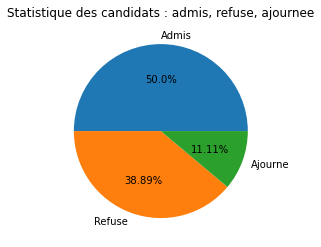

In [21]:
camembert()

**Test fonction supprimer :**

In [22]:
supprimer()

Le ou les candidats supprimés de la liste sont : 
000;Wayne;Bruce;33;admis

005;Esposito;Javier;35;admis

007;Bond;James;36;admis

010;Holt;Raymond;45;admis

012;Jun-fan;Bruce;32;admis

000;Wayne;Bruce;33;admis

005;Esposito;Javier;35;admis

007;Bond;James;36;admis

010;Holt;Raymond;45;admis

012;Jun-fan;Bruce;32;admis



Les candidats ayant été "supprimé" de la liste si nous lançons de nouveau la fonction supprimer nous devrions obtenir le message : aucun candidat n'a été supprimé

In [23]:
supprimer()

Aucun candidat n'a été supprimé
